#### [PREV](1.OOP_Single_Feature_Linear_Regression.ipynb) | [HOME](../README.md) | [NEXT](3.OOP_Polynomial_Liner_Regression.ipynb)

---

# OOP Multiple Feature Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Multiple Feature Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error 

#### Step 2 - Import Data And Visualise The Data

In [2]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

# Features variable
X_insects = insects[['continent', 'latitude', 'sex']]
# Target variable
y_insects = insects['wingsize']

insects.head()

,continent,latitude,sex,wingsize
0,1,35.5,0,901
1,1,37.0,0,896
2,1,38.6,0,906
3,1,40.7,0,907
4,1,40.9,0,898


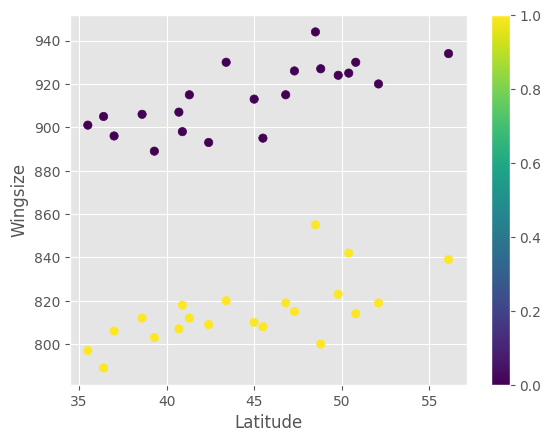

In [3]:
# Plot the data, colour coded by sex
ax = plt.scatter(insects.latitude, insects.wingsize, c=insects['sex'])
plt.xlabel("Latitude")
plt.ylabel("Wingsize")
plt.colorbar()
plt.show()

#### Step 3: Instantiate a LinearRegression Object

In [4]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [5]:

insects_regression.fit(X_insects, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [6]:
# Predict the target for the whole dataset
wing_size_predictions = insects_regression.predict(X_insects)

#Predict the target for a new data point
new_insect = pd.DataFrame({
    'continent': [1],
    'latitude': [40],
    'sex': [0]
})
new_insect['wingsize'] = insects_regression.predict(new_insect)
print(f"New insect is:\n{new_insect}")

New insect is:
   continent  latitude  sex    wingsize
0          1        40    0  903.740233


#### Step 5: Plot the Predictions

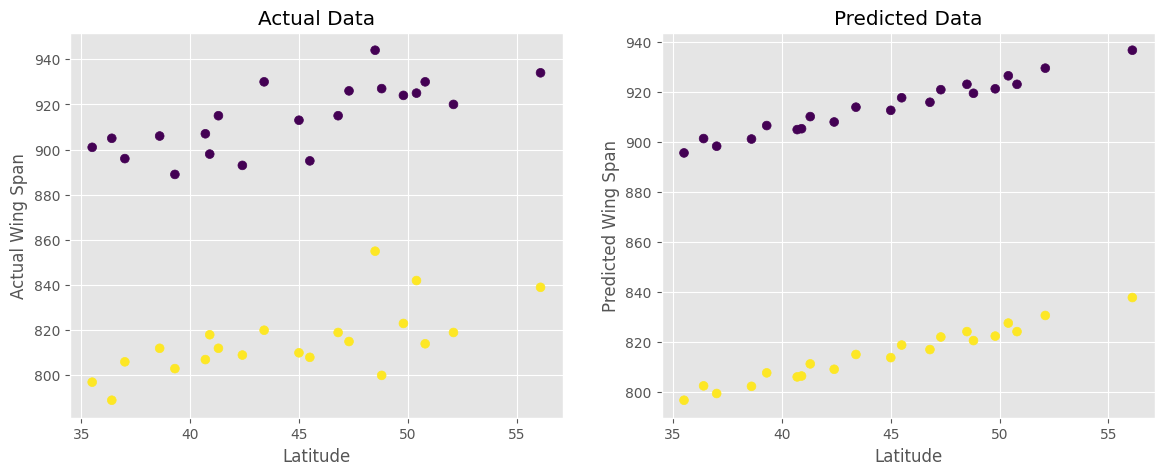

In [7]:
#Plot the predictions compared to the actual data
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, c=insects['sex'],  s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, c=insects['sex'], s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

plt.show()


#### Step 6: Evaluate The Model

In [8]:
#Get Evalutative Data from the model
print(f"Model coefficient :{insects_regression.coef_}")
print(f"Model y intercept :{insects_regression.intercept_}")
print(f"Model score :{insects_regression.score(X_insects,y_insects)}")
mae = mean_absolute_error(y_true=y_insects,y_pred=wing_size_predictions) 
mse = mean_squared_error(y_true=y_insects,y_pred=wing_size_predictions)
print("MAE:",mae)
print("MSE:",mse)

Model coefficient :[ -4.12890383   1.79260932 -98.85714286]
Model y intercept :836.1647645123378
Model score :0.9585580994936529
MAE: 7.750187049787379
MSE: 110.55759329458347


In [9]:
#Optional: Manually Evaluate the loss and cost of the model
model_loss = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': wing_size_predictions,
    'Loss': abs(insects_regression.predict(X_insects).round(2) - y_insects)**2
})
model_cost = 1 / (2 * model_loss.shape[0]) * model_loss['Loss'].sum()

print(f"The cost of this model is {model_cost:.5f}")
print(model_loss)

The cost of this model is 55.27142
    Target  Predicted result      Loss
0      901        895.673491   28.4089
1      896        898.362405    5.5696
2      906        901.230580   22.7529
3      907        904.995060    4.0000
4      898        905.353582   54.0225
5      893        908.042496  226.2016
6      913        912.703280    0.0900
7      915        915.929977    0.8649
8      927        919.515195   55.9504
9      924        921.307805    7.2361
10     930        923.100414   47.6100
11     905        901.415744   12.8164
12     889        906.614311  310.1121
13     915        910.199529   23.0400
14     930        913.964009  257.2816
15     895        917.728488  516.6529
16     926        920.955185   25.4016
17     944        923.106316  436.3921
18     925        926.512274    2.2801
19     920        929.559710   91.3936
20     934        936.730147    7.4529
21     797        796.816349    0.0324
22     806        799.505263   42.1201
23     812        802.373438 

#### Step 7: See the equation

In [10]:
# Get the coefficients and intercept
coefficients = insects_regression.coef_
intercept = insects_regression.intercept_

print(f"Equation: wingSize = {intercept} + {coefficients[0]} * continent + {coefficients[1]} * latitude + {coefficients[2]} * sex")
print(f"Rounded Equation: wingSize = {round(intercept,1)} + {round(coefficients[0],1)} * continent + {round(coefficients[1],1)} * latitude + {round(coefficients[2],1)} * sex")

#Predict the target for a new data point
new_insect = pd.DataFrame({
    'continent': [1],
    'latitude': [40],
    'sex': [0]
})
new_insect['wingsize'] = insects_regression.predict(new_insect)
print(f"\nNew insect is:\n{new_insect}")

print("\nCheck this prediction by manually evaluating the equation")

Equation: wingSize = 836.1647645123378 + -4.128903834071659 * continent + 1.7926093181888691 * latitude + -98.85714285714286 * sex
Rounded Equation: wingSize = 836.2 + -4.1 * continent + 1.8 * latitude + -98.9 * sex

New insect is:
   continent  latitude  sex    wingsize
0          1        40    0  903.740233

Check this prediction by manually evaluating the equation
